In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

In [23]:
df = pd.read_csv('checkmate_squares.csv')
df

,square,white,black,total
0,23,4346,1171,5517
1,5,9144,371,9515
2,6,24582,296,24878
3,39,2334,3186,5520
4,35,377,460,837
...,...,...,...,...
59,54,60,2001,2061
60,41,79,706,785
61,43,173,1252,1425
62,53,97,1547,1644


In [24]:
df['row'] = df['square']//8
df['column'] = df['square'] - (df['row']*8)
df['row'] = df['row'] + 1
df['checkmate_rate'] = (df['total']/df['total'].sum())*100
df['column'] = df['column'].map({0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'})
print(df['total'].sum())
print(df.sort_values(by=['square']))

264144
    square  white  black  total  row column  checkmate_rate
20       0   2647    803   3450    1      A        1.306106
7        1   3925    430   4355    1      B        1.648722
16       2   5376    463   5839    1      C        2.210537
5        3   4399    459   4858    1      D        1.839148
12       4   8576    467   9043    1      E        3.423511
..     ...    ...    ...    ...  ...    ...             ...
26      59    402   5337   5739    8      D        2.172679
21      60    469  14247  14716    8      E        5.571204
24      61    399  10474  10873    8      F        4.116315
43      62    385  26280  26665    8      G       10.094872
42      63    683  16549  17232    8      H        6.523714

[64 rows x 7 columns]


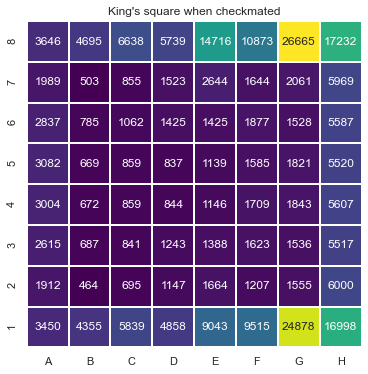

In [25]:
pivot_mates = df.pivot(index='row', columns='column', values='total')
ax = sns.heatmap(pivot_mates, linewidths=1, annot=True, fmt="d", cmap='viridis', cbar=False)
ax.invert_yaxis()
ax.set_title('King\'s square when checkmated')
ax.set(xlabel=None)
ax.set(ylabel=None)
sns.set(rc={'figure.figsize':(6,6)})
fig = ax.get_figure()
fig.savefig('checkmate_counts.png', dpi=800)

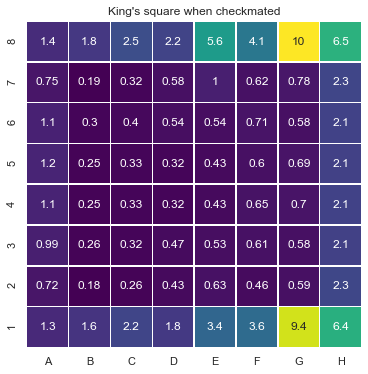

In [27]:
pivot_mates_rates = df.pivot(index='row', columns='column', values='checkmate_rate')
ax = sns.heatmap(pivot_mates_rates, linewidths=.5, annot=True, cmap='viridis', cbar=False)
ax.invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
sns.set(rc={'figure.figsize':(6,6)})
ax.set_title('King\'s square when checkmated')
fig = ax.get_figure()
fig.savefig('checkmate_rates.png', dpi=800)